Build dataset

https://blog.csdn.net/guyuealian/article/details/88343924
https://pytorch.org/vision/main/models/generated/torchvision.models.resnet152.html

In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image


D:\anaconda3\envs\dcai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os

class WeatherDataset(Dataset):
    def __init__(self, root_dir, transform=None):

        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        # map
        self.label_map = {"Cloudy": 0, "Foggy": 1, "Rainy": 2, "Snowy": 3, "Sunny": 4}
        # Read all files and assign labels
        for img_name in os.listdir(root_dir):
            label_name = ''.join([i for i in img_name if not i.isdigit()]).split('.')[0]
            label = self.label_map[label_name]
            self.images.append(os.path.join(root_dir, img_name))
            self.labels.append(label)
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = self.images[idx]
        image = Image.open(image_path)
        label = self.labels[idx]
        # one-hot
        one_hot = torch.zeros(5)  
        one_hot[label] = 1

        if self.transform:
            image = self.transform(image)
        return image, one_hot





In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
import os
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image



# Data enhancement and transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  
    transforms.RandomRotation(10),      
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create data set instances and data loaders
weather_dataset = WeatherDataset(root_dir="../Data_Q2/train_data", transform=transform)
data_loader = DataLoader(weather_dataset, batch_size=32, shuffle=True)



One-Hot: [1. 0. 0. 0. 0.]


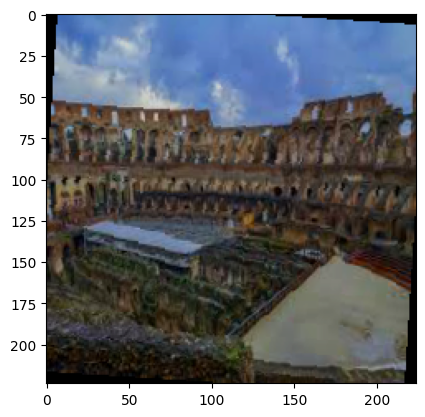

One-Hot: [0. 1. 0. 0. 0.]


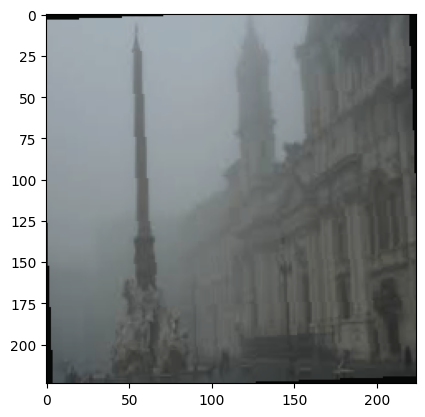

One-Hot: [0. 0. 0. 1. 0.]


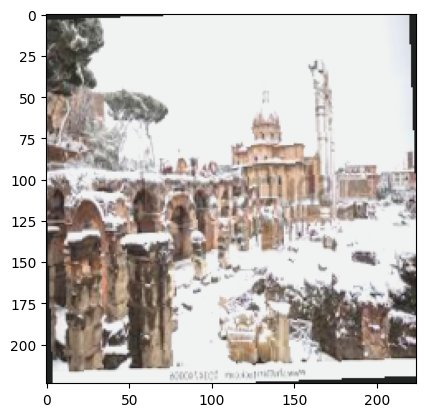

One-Hot: [0. 0. 1. 0. 0.]


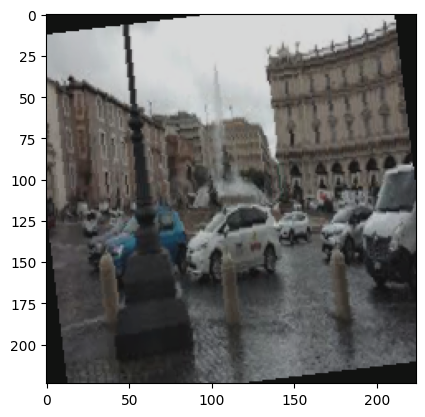

One-Hot: [0. 0. 0. 1. 0.]


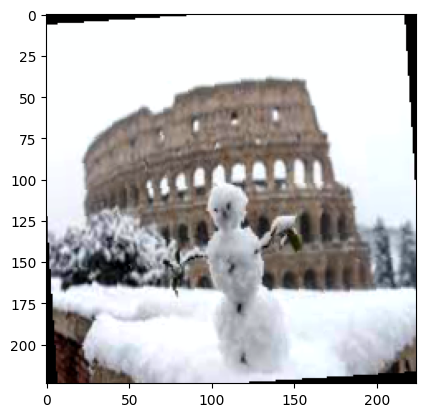

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.show()

num_images_to_show = 5

data_iter = iter(data_loader)
images, labels = next(data_iter)

# Display pictures and labels
for i in range(num_images_to_show):
    print("One-Hot:", labels[i].numpy())
    imshow(images[i])


In [11]:
# Load the pre-trained ResNet model
model = models.resnet152(pretrained=False)
# Modify the last layer to fit the 5 categories
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 5)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Set the maximum learning rate to 0.0005
max_lr = 0.001
# Set the learning rate decay factor to 0.5
lr_decay = 0.7
# Set the number of epochs to train for
num_epochs = 200

# Create a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=lr_decay)
model.to(device)



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    ... 
    ...
    ...
  (avgpool): AvgPool2d(kernel_size=7, stride=1, padding=0)
  (fc): Linear(in_features=2048, out_features=1000, bias=True)
)

In [12]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in data_loader:
        # Convert the labels to float type
        inputs, labels = inputs.to(device), labels.to(device).float()

        # Zero the gradients
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Adjust the learning rate
        lr_scheduler.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(data_loader)}")

print('Finished Training')

# evaluate
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()
        outputs = model(inputs)
        predicted = torch.sigmoid(outputs).round()  
        correct += (predicted == labels).all(dim=1).sum().item()  
        total += labels.size(0)

print(f'Accuracy on the training set: {100 * correct / total}%')



Epoch 1/200, Loss: 0.6660019680857658
Epoch 2/200, Loss: 0.5499753393232822
Epoch 3/200, Loss: 0.44710277765989304
Epoch 4/200, Loss: 0.4201788231730461
Epoch 5/200, Loss: 0.37711967900395393
Epoch 6/200, Loss: 0.349361065775156
Epoch 7/200, Loss: 0.3820735886693001
Epoch 8/200, Loss: 0.31315700709819794
Epoch 9/200, Loss: 0.29280367121100426
Epoch 10/200, Loss: 0.27096616476774216
Epoch 11/200, Loss: 0.2938957381993532
Epoch 12/200, Loss: 0.25182132981717587
Epoch 13/200, Loss: 0.2763985190540552
Epoch 14/200, Loss: 0.2500674333423376
Epoch 15/200, Loss: 0.26792257092893124
Epoch 16/200, Loss: 0.23162896744906902
Epoch 17/200, Loss: 0.24935921654105186
Epoch 18/200, Loss: 0.22100707329809666
Epoch 19/200, Loss: 0.19572046399116516
Epoch 20/200, Loss: 0.19947374612092972
Epoch 21/200, Loss: 0.1976694157347083
Epoch 22/200, Loss: 0.17783099506050348
Epoch 23/200, Loss: 0.22381353005766869
Epoch 24/200, Loss: 0.2032413799315691
Epoch 25/200, Loss: 0.23384243808686733
Epoch 26/200, Loss: 